In [21]:
#%matplotlib notebook
import sys
import os
#messi
# Standard modules used through the notebook 
import numpy as np
import matplotlib.pyplot as plt

# Tools specific for this tutorial
# They are in the .py files accompaining this notebook    

from IS18 import vistools    
from IS18 import utils          
from IS18 import rectification  
from IS18 import stereo                 
from IS18 import triangulation

import srtm4
import s2p
import rpcm
import pickle
from PIL import Image

from bundle_adjust import ba_timeseries
from bundle_adjust import ba_utils   

# Display and interface settings (just for the notebook interface)
%load_ext autoreload
%autoreload 2
np.set_printoptions(linewidth=150)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Set experiment

In [22]:
#GLOBAL VARIABLES
ALL_PIPELINE = True
CHECK_TRIANGULATION_DISTANCE = True
SAVE_SIFT_CLOUDS = True
print('Global variables defined')

# select site and order of input pairs
site = 'IARPA' # IARPA, JAX_113, JAX_161, JAX_251
order = 'heuristic' # oracle, heuristic, sift

exp_name = site+'_ba_rotations_'+order
input_dir = os.path.join('exp/',exp_name)
print('All files will be saved in "'+ input_dir + '"')
os.makedirs(input_dir, exist_ok=True)

Global variables defined
All files will be saved in "exp/IARPA_ba_rotations_heuristic"


### Load data

Found 47 images
Number of images to be used: 47
Finished loading RPC coefficients
Finished cropping the AOI in each image



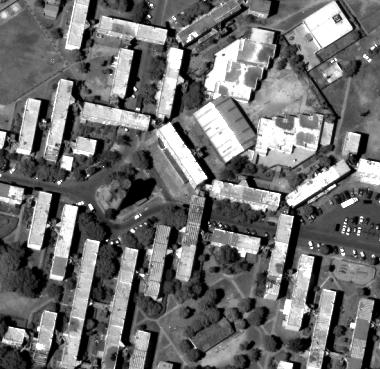
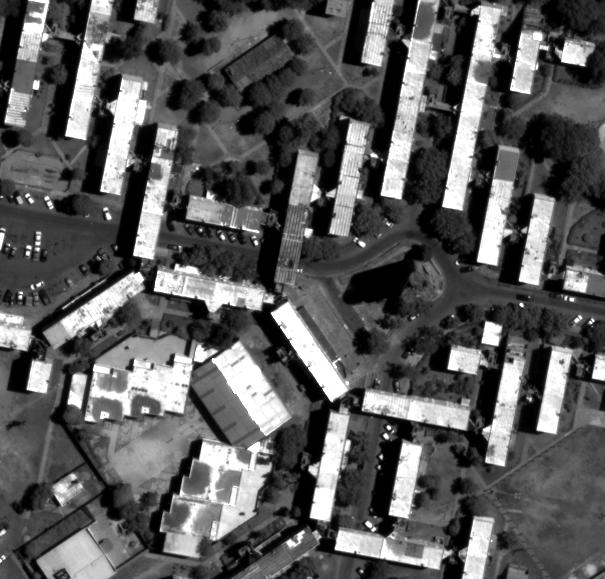
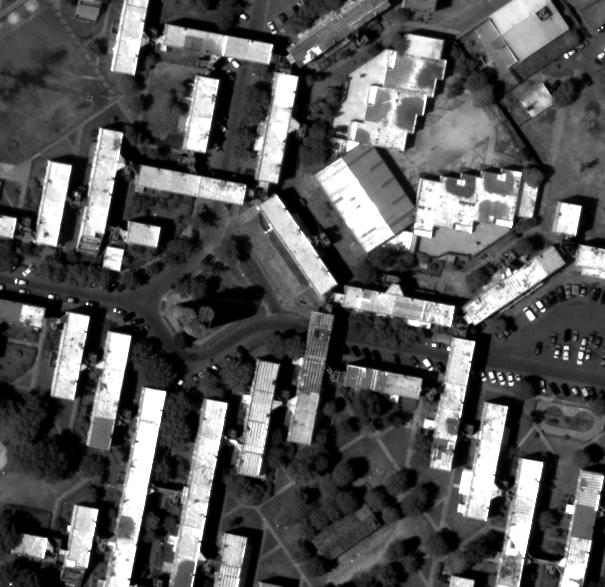
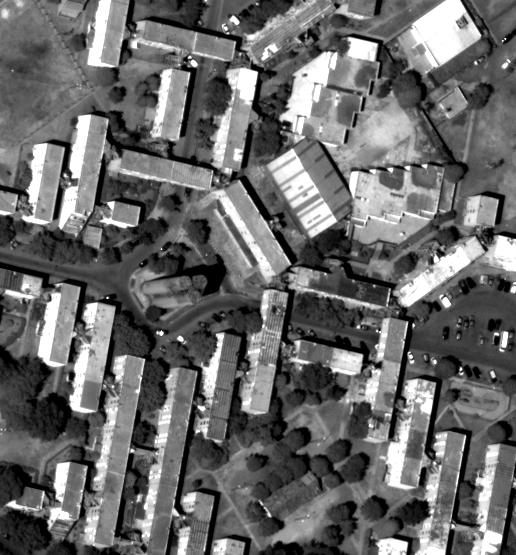
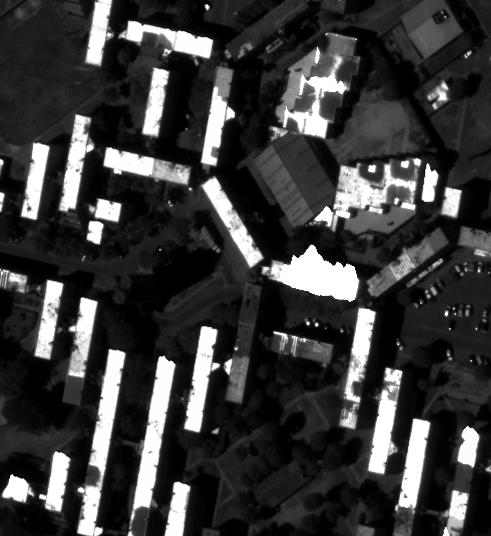
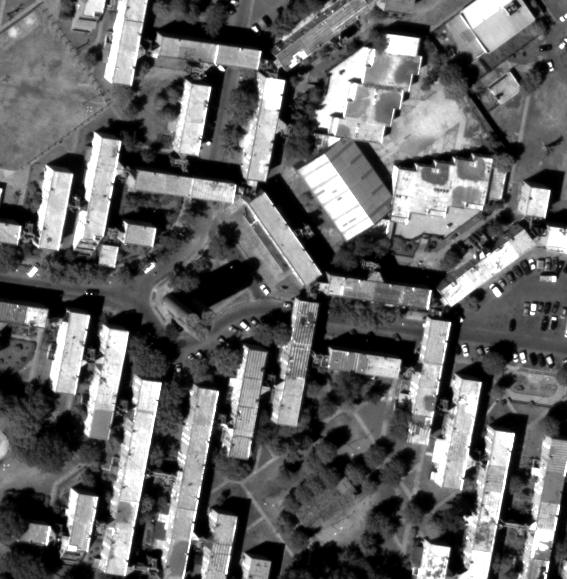
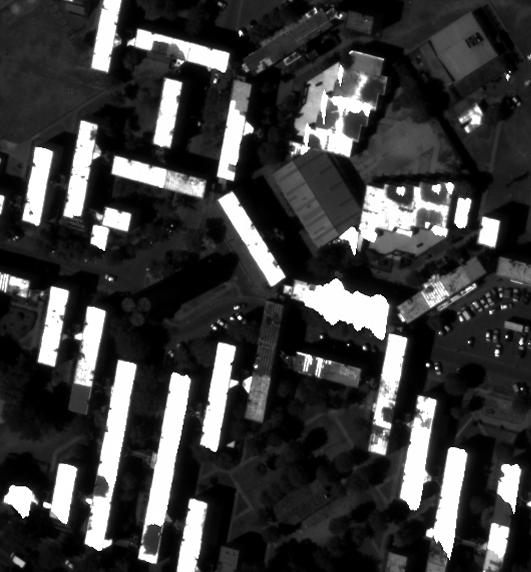
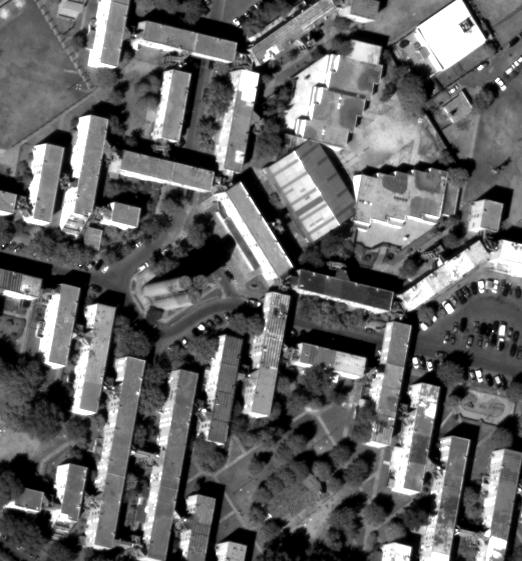
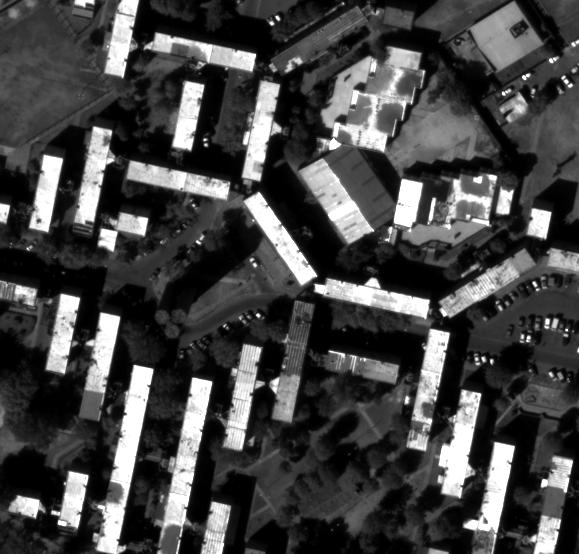
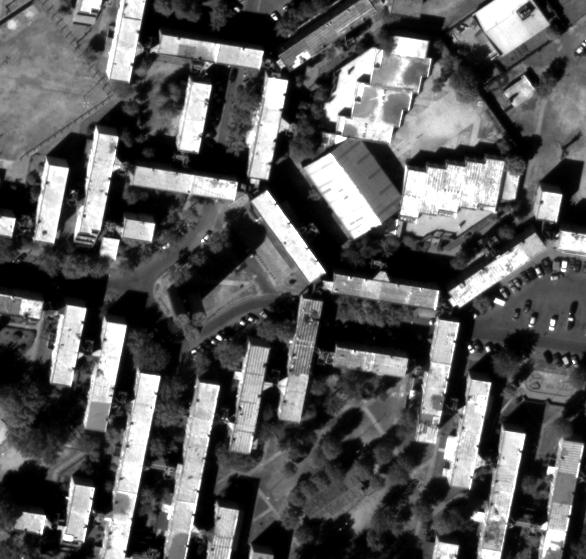
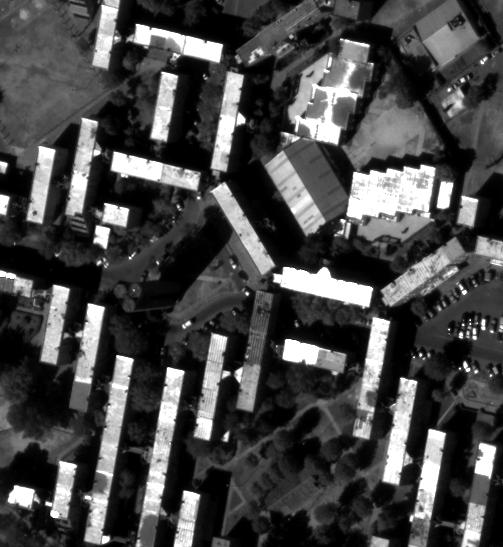
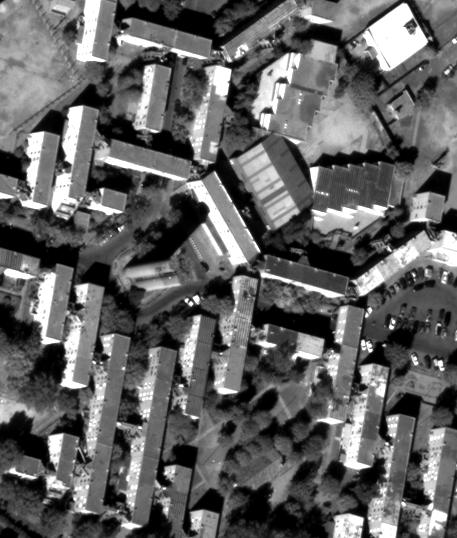
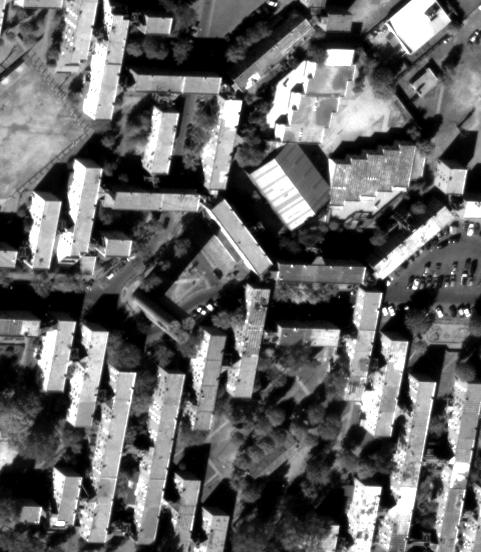
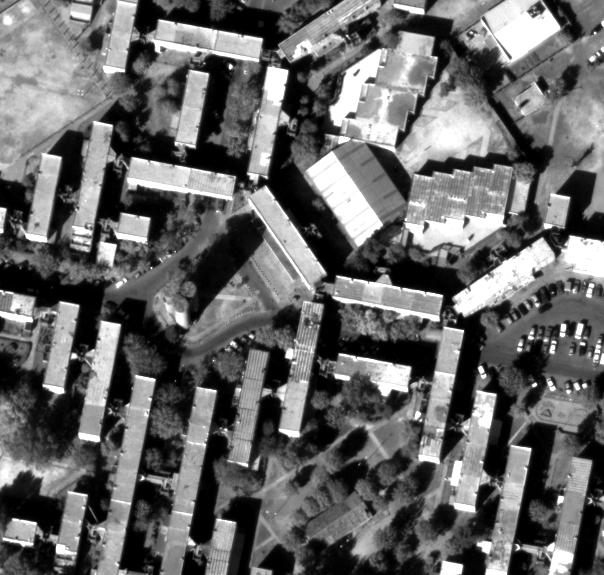
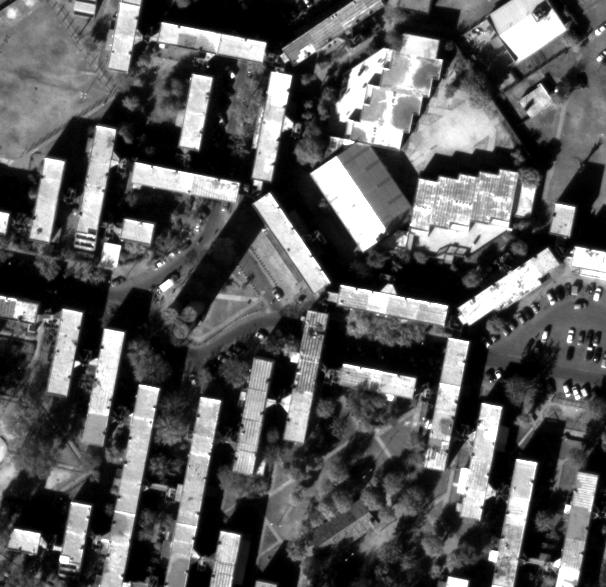
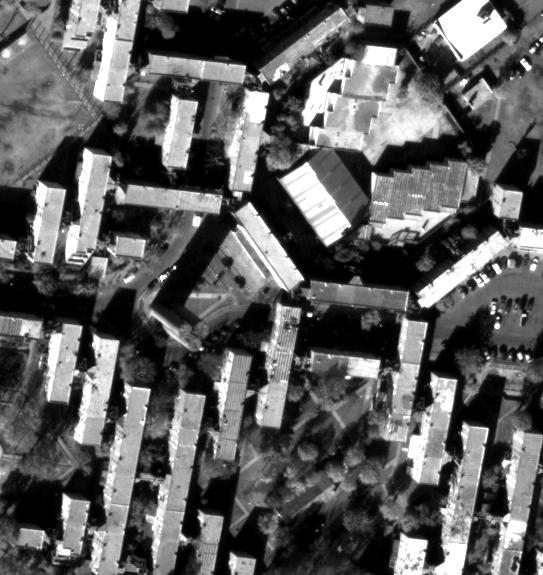
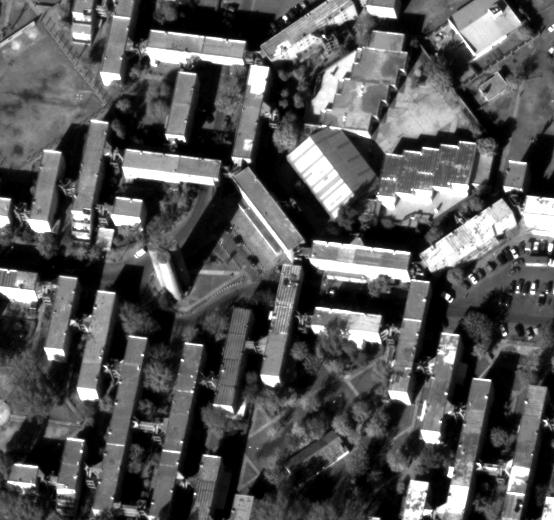
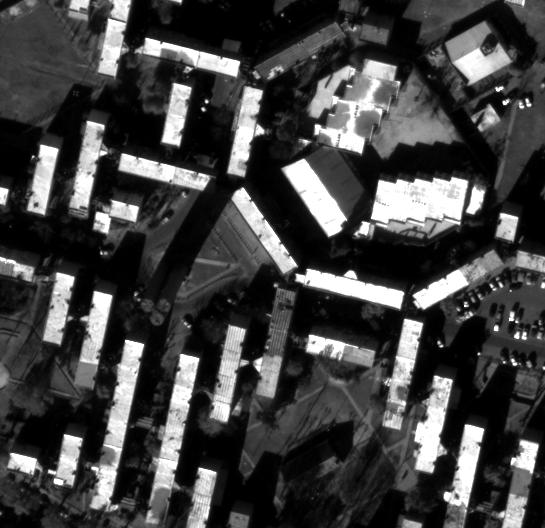
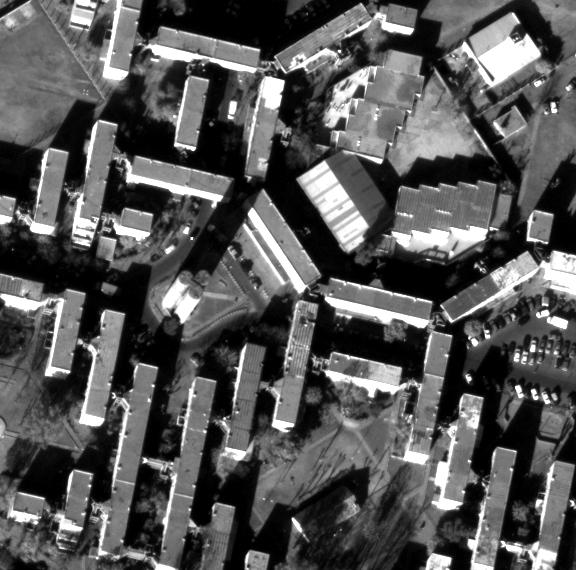
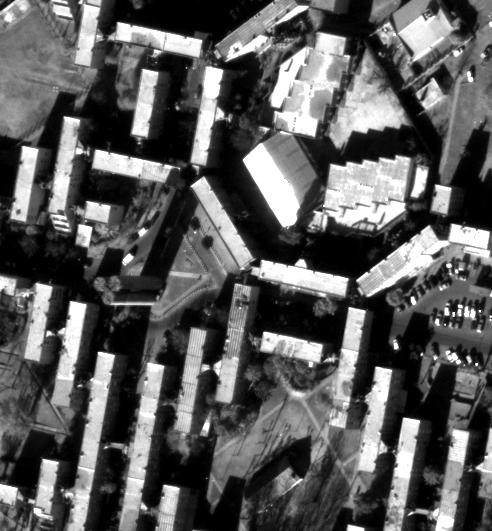
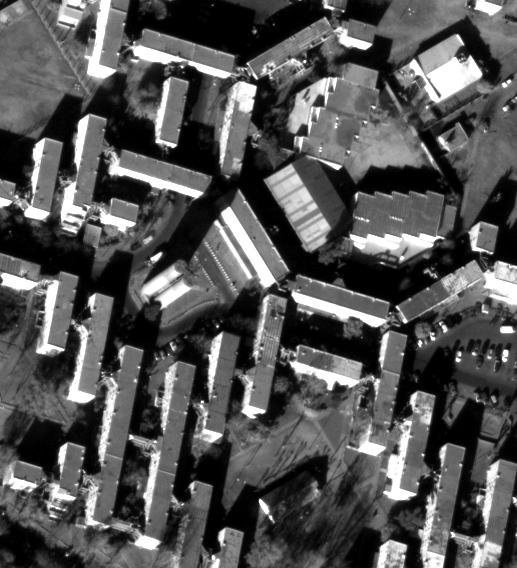
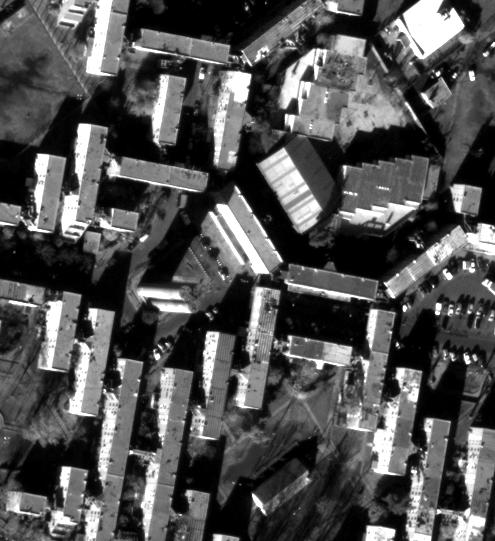
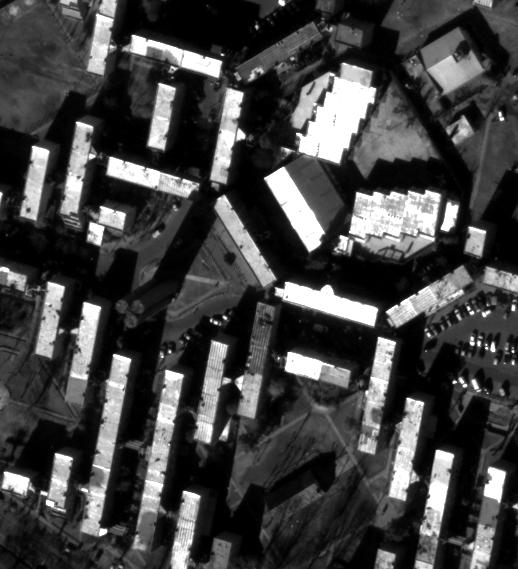
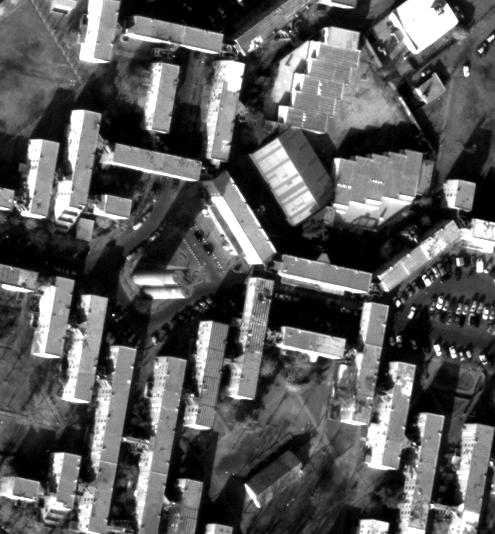
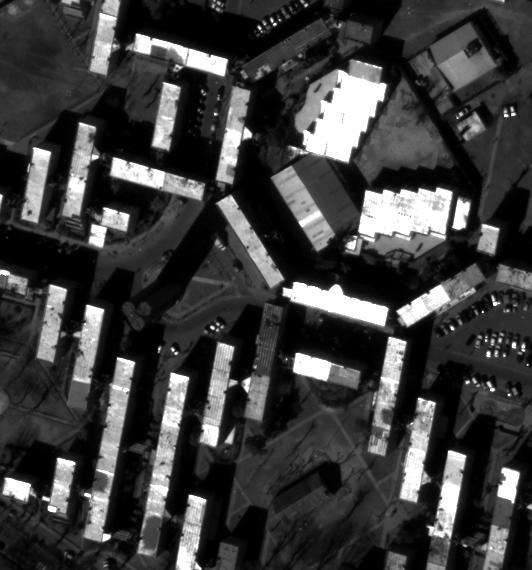
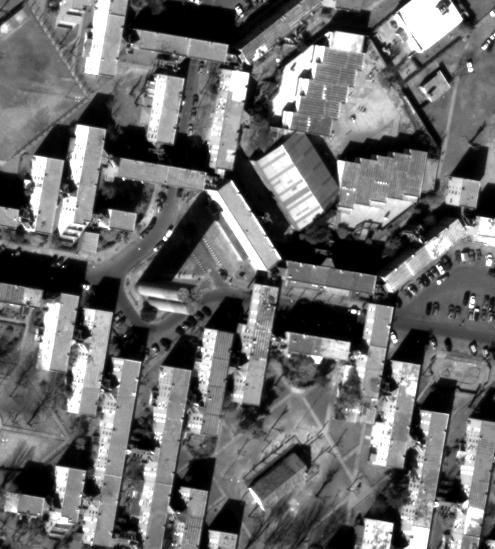
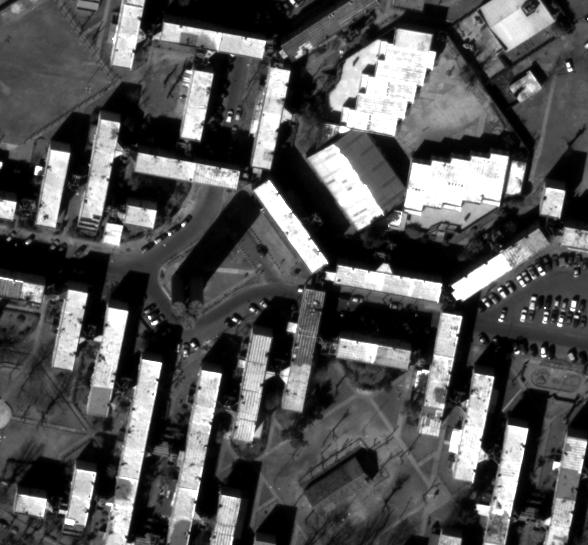
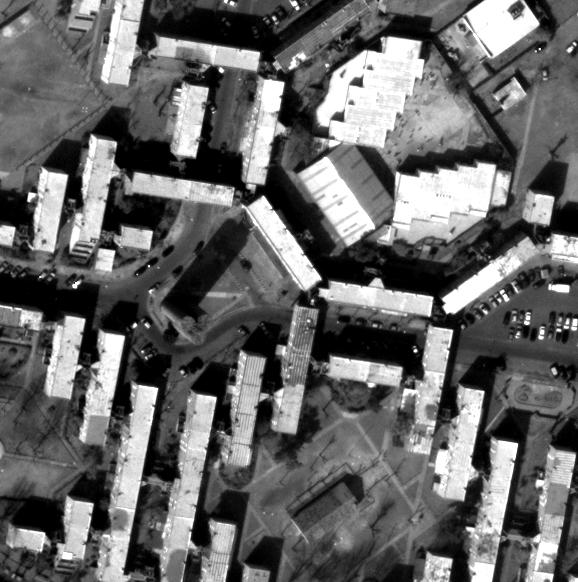
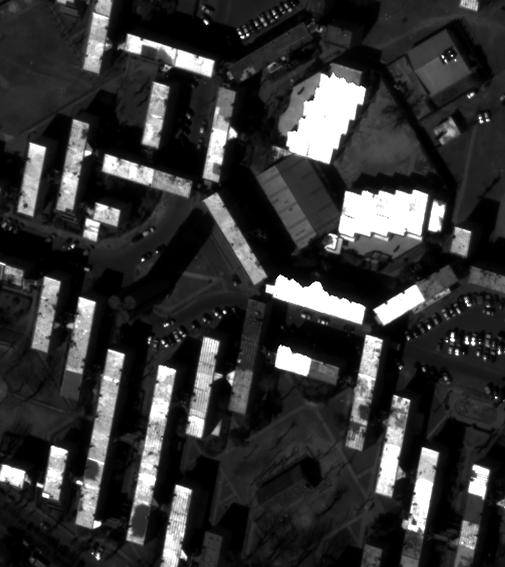
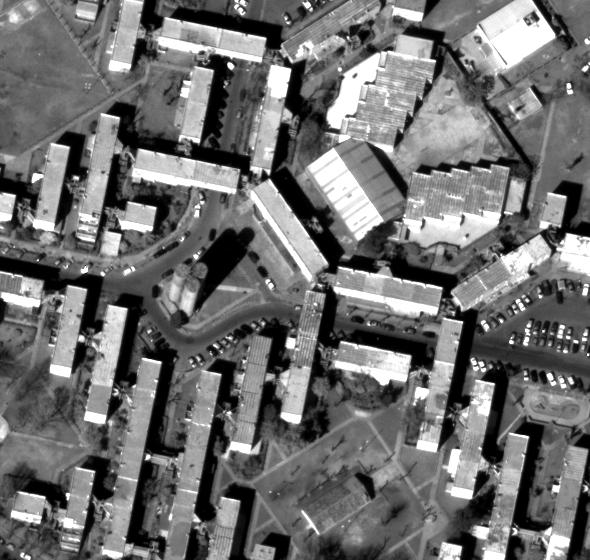
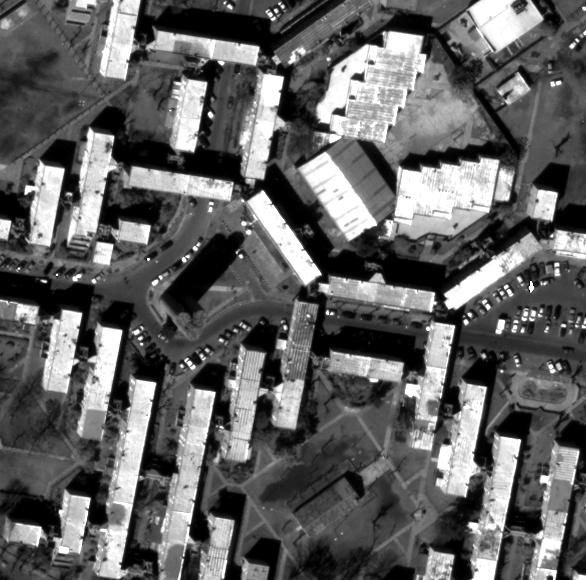
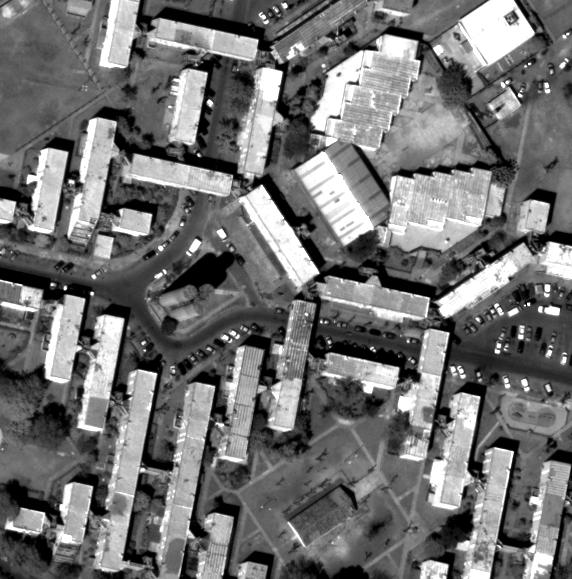
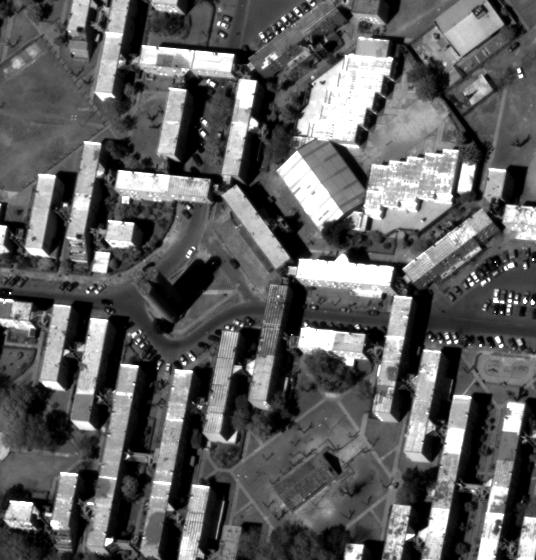
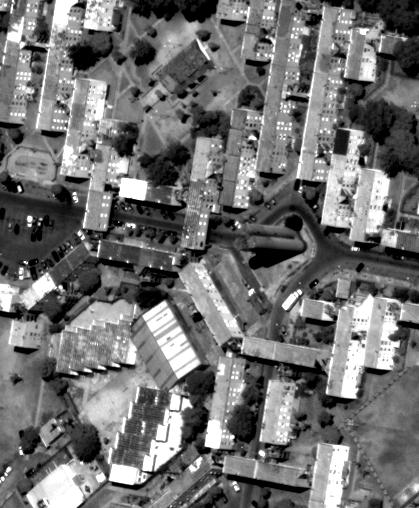
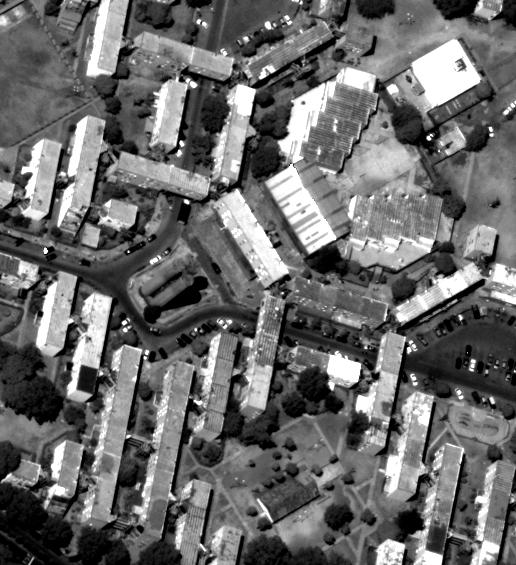
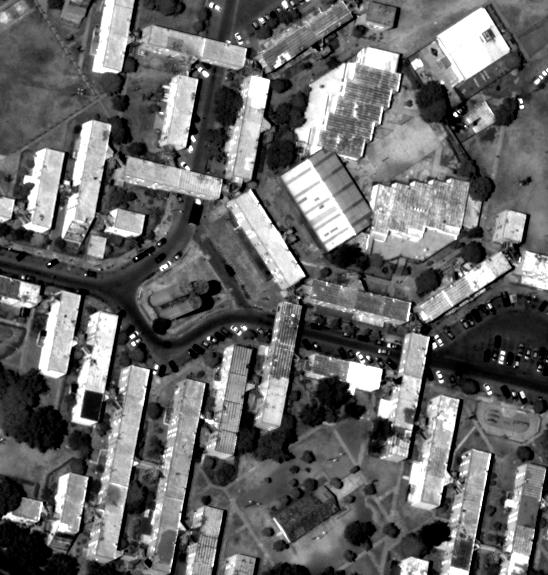
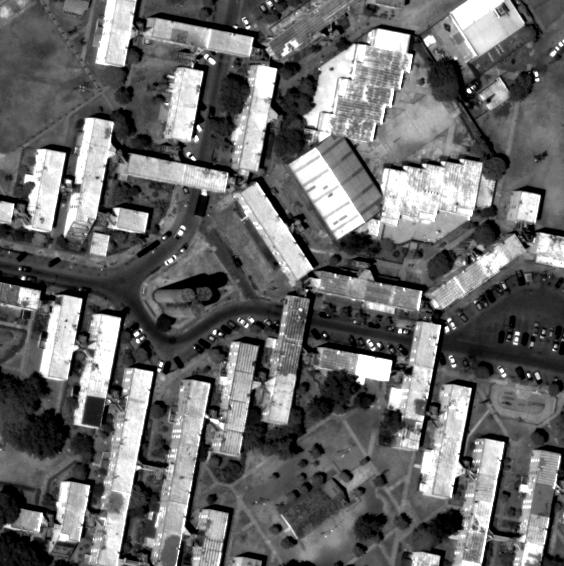
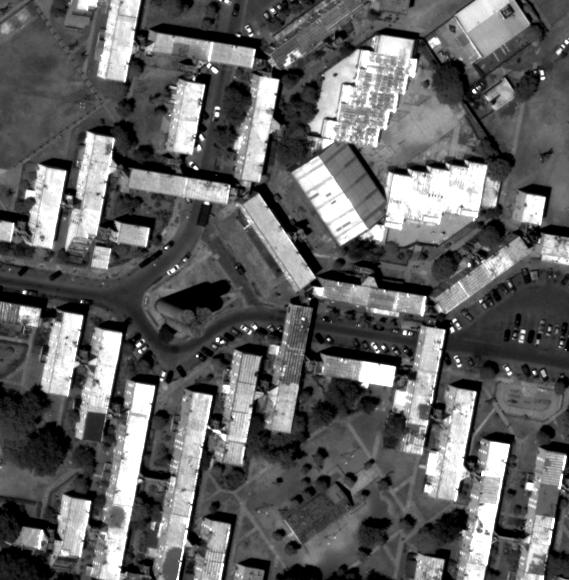
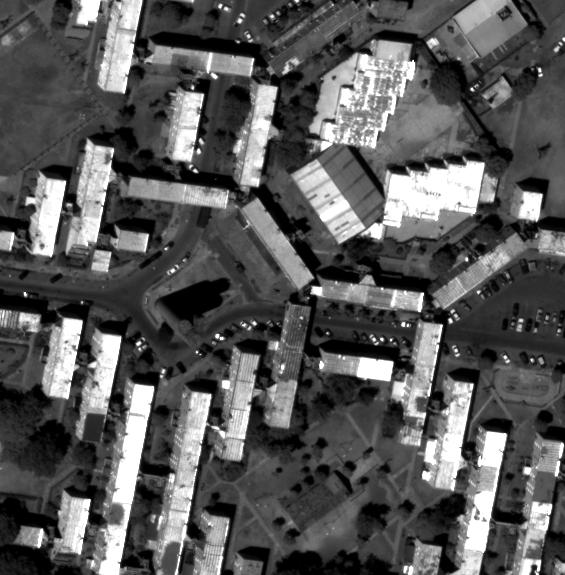
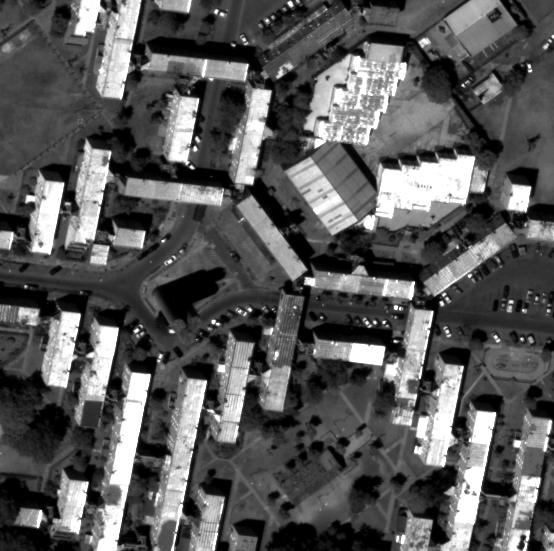
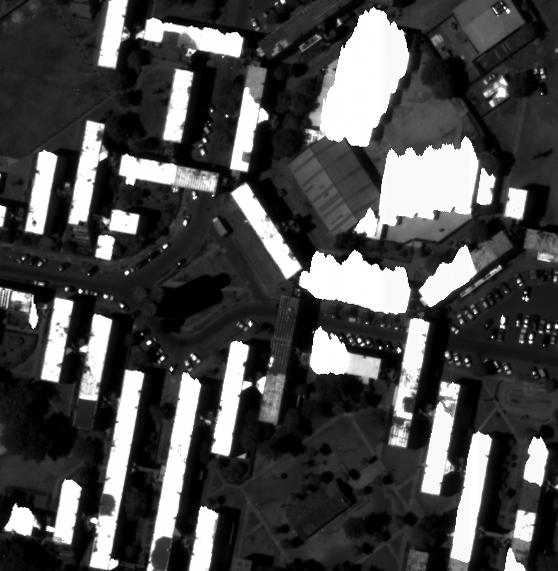
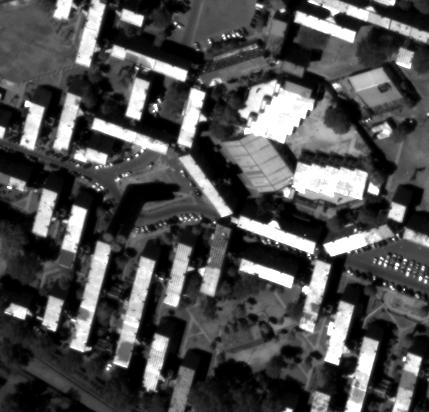
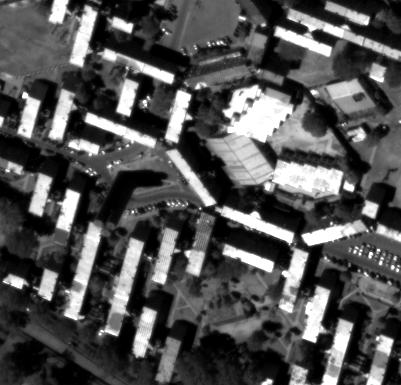
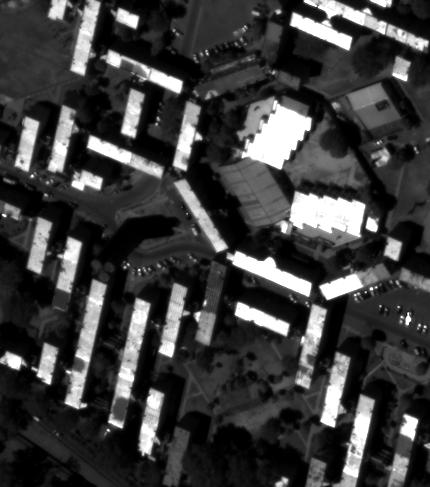
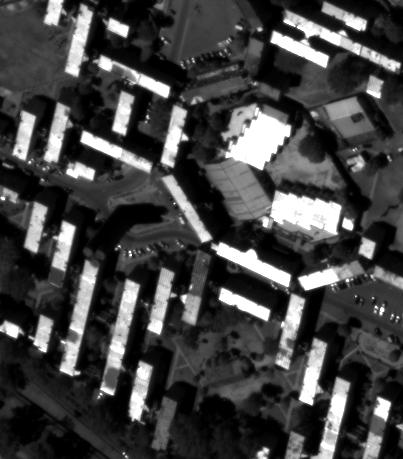
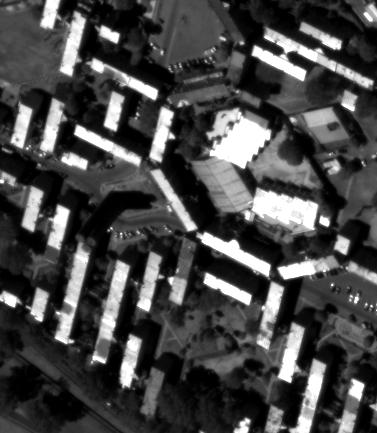
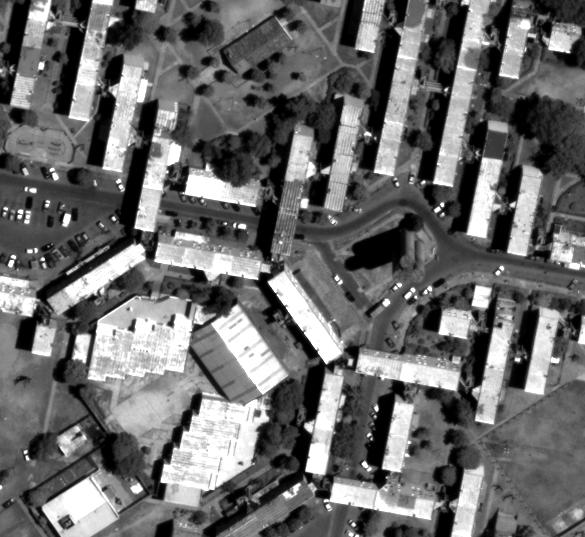

Crops were saved at data/ICCV19_IARPA


In [23]:
if site == 'IARPA':   
    # list the tiff images available in the remote folder
    IARPAurl = 'http://138.231.80.166:2332/iarpa-2016/cloud_optimized_geotif/'
    myimages = utils.listFD(IARPAurl, 'TIF')

    # sort the images by acquisition date
    myimages = sorted(myimages, key=utils.acquisition_date)
    myimages.pop(11)
    myimages.pop(13)
    myimages.pop(19)
    print('Found {} images'.format(len(myimages)))
    
    # set the coordinates of the area of interest as a GeoJSON polygon (Buenos aires AOI)
    aoi = {'coordinates': [[[-58.585185, -34.490883], [-58.585185, -34.48922 ], [-58.583104, -34.48922 ],
                            [-58.583104, -34.490883], [-58.585185, -34.490883]]], 'type': 'Polygon'}
    aoi['center'] = np.mean(aoi['coordinates'][0][:4], axis=0).tolist() # add center field
    
elif site in ['JAX_113', 'JAX_161', 'JAX_251']:   
    # list the tiff images available in the remote folder
    myimages = utils.listFD('http://138.231.80.166:2332/core3d/Jacksonville/WV3/PAN/', '.NTF.tif')

    # list the tiff images available in the remote folder
    mygts = utils.listFD('http://138.231.80.166:2332/grss-2019/track_3/Track3-Truth-geolocated/', '_DSM.tif')
    mygt_fn = [i for i in mygts if site in i]
    aoi = utils.get_image_longlat_polygon(mygt_fn[0])
    aoi['center'] = np.mean(aoi['coordinates'][0][:4], axis=0).tolist() # add center field
    
else: 
    print('input site is not valid!')
    
# select the number of cameras for the current run
n_cam = len(myimages)
print('Number of images to be used:', n_cam)

# load RPC coefficients
myrpcs = [rpcm.rpc_from_geotiff(x) for x in myimages]
print('Finished loading RPC coefficients')

# load image crops
mycrops = ba_utils.get_image_crops_from_aoi(myimages, aoi, display=True, \
                                            save_crops=True, output_dir='data/ICCV19_{}'.format(site))

### Set bundle adjustment input and load pipeline

In [8]:
ba_input_data = {}
ba_input_data['input_dir'] = input_dir
ba_input_data['n_adj'] = 0
ba_input_data['n_new'] = len(myimages)
ba_input_data['image_fnames'] = myimages
ba_input_data['crops'] = mycrops
ba_input_data['rpcs'] = myrpcs
ba_input_data['cam_model'] = 'Perspective'
ba_input_data['masks'] = None
ba_input_data['aoi'] = aoi

print('ba_input_data set!')

from bundle_adjust.ba_pipeline import BundleAdjustmentPipeline

# run bundle adjustment
ba_pipeline = BundleAdjustmentPipeline(ba_input_data,
                                       display_plots=True,
                                       skysat=False,
                                       use_masks=False,
                                       feature_detection_lib='opencv')
ba_pipeline.display_aoi()

ba_input_data set!


Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

### Run bundle adjustment

Approximating RPCs as Perspective projection matrices
26 projection matrices / 26 (0 err)
Done!

Running generic opencv feature detection...

Parameters:
      use_masks:    False
      matching_thr: 0.6


Found 5321 keypoints in image 0
Found 6468 keypoints in image 1
Found 6420 keypoints in image 2
Found 6434 keypoints in image 3
Found 5348 keypoints in image 4
Found 6346 keypoints in image 5
Found 6925 keypoints in image 6
Found 6134 keypoints in image 7
Found 6781 keypoints in image 8
Found 6271 keypoints in image 9
Found 5210 keypoints in image 10
Found 5534 keypoints in image 11
Found 6010 keypoints in image 12
Found 4713 keypoints in image 13
Found 7073 keypoints in image 14
Found 6333 keypoints in image 15
Found 5081 keypoints in image 16
Found 6740 keypoints in image 17
Found 6400 keypoints in image 18
Found 5732 keypoints in image 19
Found 6721 keypoints in image 20
Found 5305 keypoints in image 21
Found 6094 keypoints in image 22
Found 6980 keypoints in image 23
Found 7094 k

Pair (14,20) -> 145 matches
Pair (14,21) -> 120 matches
Pair (14,22) -> 124 matches
Pair (14,23) -> 355 matches
Pair (14,24) -> 315 matches
Pair (14,25) -> 403 matches
Pair (15,16) -> 22 matches
Pair (15,17) -> 99 matches
Pair (15,18) -> 77 matches
Pair (15,19) -> 58 matches
Pair (15,20) -> 316 matches
Pair (15,21) -> 71 matches
Pair (15,22) -> 345 matches
Pair (15,23) -> 120 matches
Pair (15,24) -> 128 matches
Pair (15,25) -> 91 matches
Pair (16,17) -> 68 matches
Pair (16,18) -> 40 matches
Pair (16,19) -> 25 matches
Pair (16,20) -> 10 matches
Pair (16,21) -> 50 matches
Pair (16,22) -> 20 matches
Pair (16,23) -> 86 matches
Pair (16,24) -> 61 matches
Pair (16,25) -> 148 matches
Pair (17,18) -> 2584 matches
Pair (17,19) -> 1251 matches
Pair (17,20) -> 82 matches
Pair (17,21) -> 57 matches
Pair (17,22) -> 94 matches
Pair (17,23) -> 1224 matches
Pair (17,24) -> 954 matches
Pair (17,25) -> 211 matches
Pair (18,19) -> 2032 matches
Pair (18,20) -> 63 matches
Pair (18,21) -> 55 matches
Pair (1

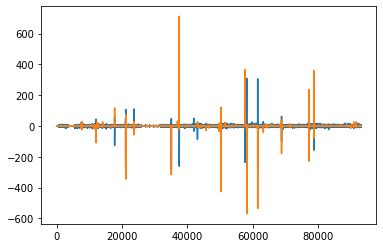

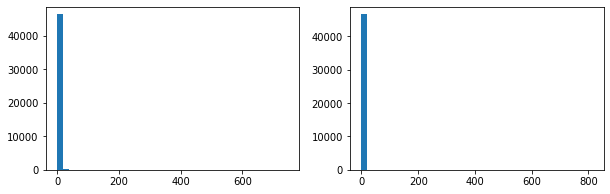

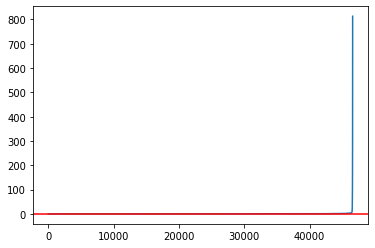

Deleted 986 observations (2.12%) and 34 tracks (0.24%)

Correspondence matrix saved!
Defining BA input parameters...
26
(26, 14142)
(26,)
[1060 1709 1633 1930 1106 3047 3240 1240 1608 1545 1352 1334 1386  770 1763 1259  521 3591 3600 2474 1557  709 1469 2286 1925 1478]
C shape: (52, 14142)
C_new shape: (52, 14142)
26 cameras in total, 0 fixed and 26 to be adjusted
3 parameters per camera and 14142 3d points to be optimized
...done!

Shape of matrix A: 91184x42504
`ftol` termination condition is satisfied.
Function evaluations 3, initial cost 3.5617e+05, final cost 2.7133e+03, first-order optimality 4.62e+05.
Optimization took 2 seconds

Error before BA (mean / median): 3.85 / 2.99
Error after  BA (mean / median): 0.31 / 0.22

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25

Bundle adjusted projection matrices successfully saved!

image 0, RMSE calibrated RPC = 6.694904666647842e-05
image 1, RMSE calibrated RPC = 5.139044668732515e-05
image 2, RMSE calibrated RPC = 3

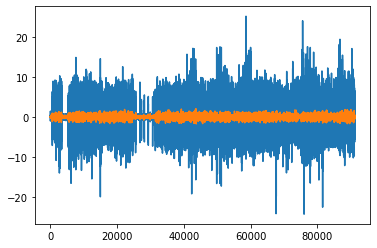

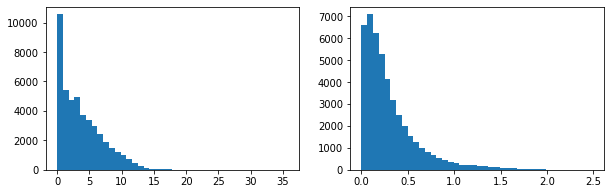

In [9]:
ba_pipeline.run()

### Visualize a feature track before and after

Verify that the projections after Bundle Adjustment are closer to the observations of the feature track.

Displaying feature track with index 6518

3D location (initial)  : [  798233.25337524 -5451694.17156342  3202051.87618472]
3D location (after BA) : [  798233.18652956 -5451693.92300851  3202053.52848784] 

 ----> Real 2D loc in im 7  (sol) =  [ 91.3983078  264.30438232]
 ----> Proj 2D loc in im 7  before BA =  [ 90.60488141 265.10145304]
 ----> Proj 2D loc in im 7  after  BA =  [ 91.17900346 264.52637187]
              Reprojection error beofre BA: 1.590497114115749
              Reprojection error after  BA: 0.4412938862602829


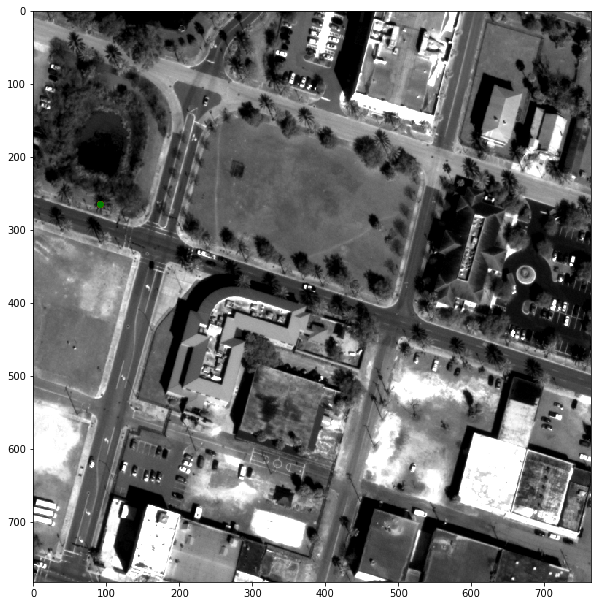

 ----> Real 2D loc in im 13  (sol) =  [ 79.57362366 263.94204712]
 ----> Proj 2D loc in im 13  before BA =  [ 80.03388893 263.52081401]
 ----> Proj 2D loc in im 13  after  BA =  [ 79.81635969 263.71991479]
              Reprojection error beofre BA: 0.8814983805776819
              Reprojection error after  BA: 0.46486836577830104


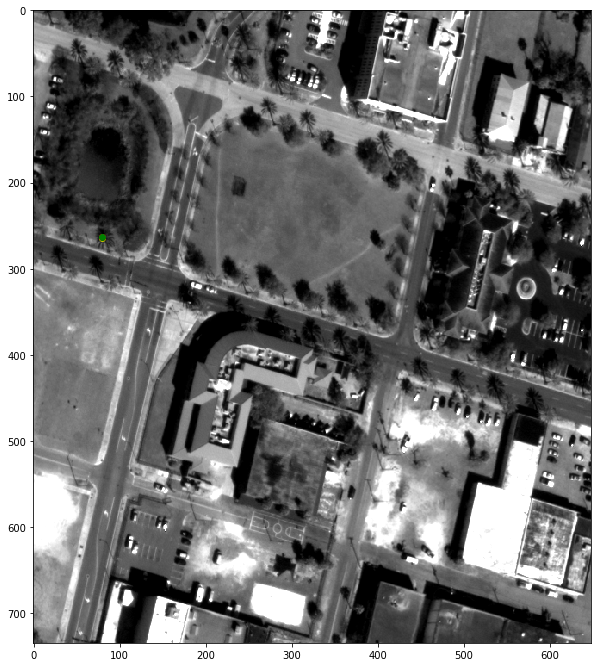

In [11]:
ba_pipeline.visualize_feature_track()

### Detailed view of initial-final reprojection errors for a particular image

This can be used to analyse a particular image in detail.

image 0, mean abs reproj error before BA: 3.2865
image 0, mean abs reproj error after  BA: 0.3284


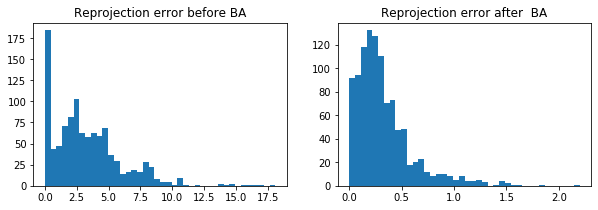

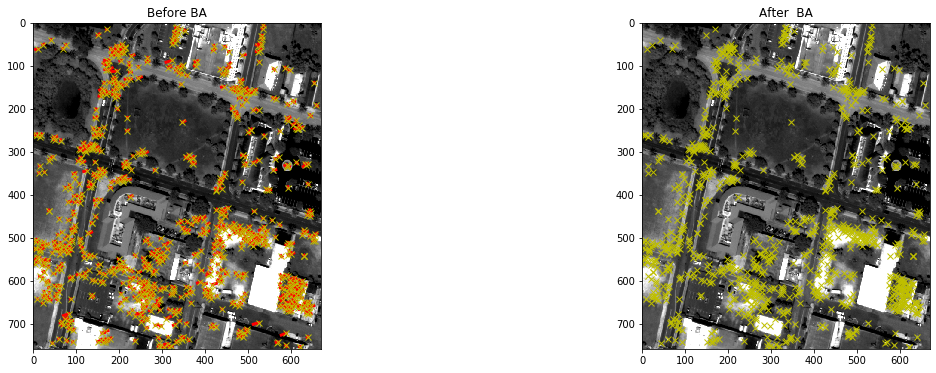

In [14]:
# set the index of the image to analyse
im_idx = 0

ba_pipeline.analyse_reproj_err_particular_image(im_idx, plot_features=True)

### Do the 3D points fall in the correct place?

Verify that the projection of the bounding box containing the point cloud of the scene falls in the correct area of the Earth.

In [15]:
from bundle_adjust.ba_triangulation import project_xyz_bbx_on_map

project_xyz_bbx_on_map(ba_pipeline.pts_3d_ba, map_zoom=17)

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

### Check the distance between the projection rays of two cameras

This gives an idea of the error in the traingulation of points before and after Bundle Adjustment.

Checking the distance between projection rays...
...done!



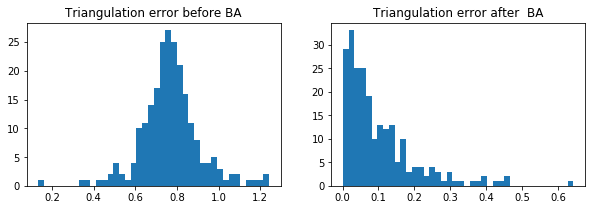

In [17]:
from PIL import Image

if CHECK_TRIANGULATION_DISTANCE and ba_pipeline.cam_model == 'Perspective':

    from bundle_adjust.ba_triangulation import check_distance_between_projection_rays_matches
    
    pair_idx = 0
    
    idx_cam1 = ba_pipeline.pairs_to_triangulate[pair_idx][0]
    idx_cam2 = ba_pipeline.pairs_to_triangulate[pair_idx][1]
    check_distance_between_projection_rays_matches(idx_cam1, idx_cam2, ba_pipeline.C, 
                                                   ba_pipeline.input_P, ba_pipeline.P_crop_ba, 
                                                   plot_err_hist=True, save_err_dsm=False, 
                                                   aoi_lonlat=aoi, output_dir=input_dir)

### Save point clouds of SIFT keypoints before and after Bundle Adjustment 

In [18]:
if SAVE_SIFT_CLOUDS:
    
    from bundle_adjust.ba_triangulation import write_feature_tracks_stereo_point_clouds

    write_feature_tracks_stereo_point_clouds(ba_pipeline.pairs_to_triangulate, ba_pipeline.C, 
                                             ba_pipeline.input_P, ba_pipeline.P_crop_ba, output_dir=input_dir)
    

Writing point clouds of SIFT keypoints...
...done!



### Compute point clouds for all pairs

In [20]:
if ALL_PIPELINE:
    
    # build point clouds
    from bundle_adjust.ba_triangulation import dense_cloud_from_pair
    
    import warnings
    warnings.filterwarnings('ignore')
    
    list_of_pairs = ba_utils.get_predefined_pairs('pairs/'+site+'_'+order+'.txt', site, order, myimages)
    os.makedirs(input_dir+'/clouds', exist_ok=True)

    print('\nComputing point clouds from stereo pairs...')
    for iter_cont, pair in enumerate(list_of_pairs):
        i, j = pair
        args = [i, j, ba_pipeline.P_crop_ba[i], ba_pipeline.P_crop_ba[j], \
                ba_pipeline.cam_model, ba_pipeline.myimages, ba_pipeline.crop_offsets, aoi]
        xyz =  dense_cloud_from_pair(*args)
        ba_utils.write_point_cloud_ply(input_dir+'/clouds/dense_cloud_{:02}_{:02}.ply'.format(i,j), xyz)
        print('{} / {} done'.format(iter_cont+1, len(list_of_pairs)))
    print('\nDone!\n')


Computing point clouds from stereo pairs...
t=4.3052 done building CV
t=8.4681 done sgmfilter
t=8.7318 done aggregation and WTA refinement
t=3.7784 done building CV
t=7.9319 done sgmfilter
t=8.2812 done aggregation and WTA refinement
1 / 50 done
t=4.0829 done building CV
t=8.3756 done sgmfilter
t=8.6506 done aggregation and WTA refinement
t=4.1423 done building CV
t=8.4301 done sgmfilter
t=8.7154 done aggregation and WTA refinement
2 / 50 done
t=3.2283 done building CV
t=7.0310 done sgmfilter
t=7.2615 done aggregation and WTA refinement
t=3.2739 done building CV
t=7.0020 done sgmfilter
t=7.2519 done aggregation and WTA refinement
3 / 50 done
t=3.7682 done building CV
t=8.0056 done sgmfilter
t=8.3072 done aggregation and WTA refinement
t=4.1233 done building CV
t=8.2096 done sgmfilter
t=8.4678 done aggregation and WTA refinement
4 / 50 done
t=5.1216 done building CV
t=10.2998 done sgmfilter
t=10.6305 done aggregation and WTA refinement
t=5.3311 done building CV
t=10.3098 done sgmfilter

t=8.4841 done sgmfilter
t=8.8233 done aggregation and WTA refinement
40 / 50 done
t=4.1579 done building CV
t=8.2199 done sgmfilter
t=8.4374 done aggregation and WTA refinement
t=3.7113 done building CV
t=7.6182 done sgmfilter
t=7.8388 done aggregation and WTA refinement
41 / 50 done
t=2.7464 done building CV
t=6.2416 done sgmfilter
t=6.4327 done aggregation and WTA refinement
t=2.9930 done building CV
t=7.0778 done sgmfilter
t=7.3794 done aggregation and WTA refinement
42 / 50 done
t=5.7722 done building CV
t=11.2467 done sgmfilter
t=11.6405 done aggregation and WTA refinement
t=5.5664 done building CV
t=11.4491 done sgmfilter
t=11.8532 done aggregation and WTA refinement
43 / 50 done
t=4.8862 done building CV
t=9.2820 done sgmfilter
t=9.5909 done aggregation and WTA refinement
t=4.8852 done building CV
t=9.5525 done sgmfilter
t=9.8661 done aggregation and WTA refinement
44 / 50 done
t=5.4949 done building CV
t=11.2443 done sgmfilter
t=11.6570 done aggregation and WTA refinement
t=6.4